In [1]:
import sys
sys.path.append('..\..\src') # this ensures that the src models are located to import them bellow
#sys.path.append('C:\\Users\\Marios\\Desktop\\Μάριος\\BotBattleOfSea\\src') deprecated absolute path

In [147]:
import cv2
import numpy as np
import pyautogui  # Import pyautogui for screen capture
from ultralytics import YOLO
from ultralytics.utils.plotting import colors, Annotator
from PIL import ImageGrab
from win32api import GetSystemMetrics
import keyboard #pip install keyboard
import time
from Paths import *
import math

We will hardwrite all Tools function because we cant use from docs the function getText

In [304]:
time_of_pause=0


In [305]:
def click(middle_x,middle_y):
    pyautogui.click(middle_x, middle_y)
    print("function: click") # for debugging only
    time.sleep(time_of_pause) # for debugging only


def screenshot(x1, y1, x2, y2,i):
    # Convert coordinates to integers
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

    # Take a screenshot of the specified region
    screenshot = pyautogui.screenshot(region=(x1,y1,x2-x1,y2-y1))

    # Save the screenshot
    screenshot.save(f'OcrTexts\screenshot{i}.png')
    print("function: screenshot") # for debugging only
    time.sleep(time_of_pause) # for debugging only

def screenshot_array(x1, y1, x2, y2, i):
    # Convert coordinates to integers
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    
    # Expand the region by 5 pixels
    x1 -= 5
    y1 -= 5
    x2 += 5
    y2 += 5

    # Take a screenshot of the expanded region
    screenshot = pyautogui.screenshot(region=(x1, y1, x2 - x1, y2 - y1))
    screenshot.save(f'C:\\Users\\Marios\\Desktop\\Μάριος\\BotBattleOfSea\\src\\OcrTexts\\screenshot{i}.png')

    print("function: screenshot_array")  # for debugging only
    time.sleep(time_of_pause)  # for debugging only
    return np.array(screenshot)




#this absolute path works only for ipynb and not for the actual Tools.py file
def getText(screenshot_array_format,modelOCR=YOLO(absolute_path_ocr_model_640px_windows)):
    results = modelOCR.predict(screenshot_array_format,imgsz=640, conf=0.2)
    boxes = results[0].boxes.xyxy.cpu()
    clss = results[0].boxes.cls.cpu().tolist()
    Dictionary = results[0].names
    mapping = {}
    for box, cls in zip(boxes, clss):
        mapping[box[0]] = Dictionary[cls][-1]
        #print(f"box={box[0]}, cls={cls}->{Dictionary[cls]}")
    
    sorted_dict = {k: v for k, v in sorted(mapping.items(), key=lambda item: item[0])}
    string=''
    for value in sorted_dict.values():
        string=string+value

    print("function: getText") # for debugging only
    time.sleep(time_of_pause) # for debugging only
    return string

def mouse_in_safe_zone():
    pyautogui.FAILSAFE = False  # Disables the fail-safe feature
    pyautogui.moveTo(0, 0, duration=0)
    print("function: mouse_in_safe_zone") # for debugging only
    time.sleep(time_of_pause) # for debugging only

import random

def getWidth_Height(x1, x2, y1, y2):
    # Ensure x1 < x2 and y1 < y2
    x_min, x_max = min(x1, x2), max(x1, x2)
    y_min, y_max = min(y1, y2), max(y1, y2)
    
    Width=x_max-x_min
    Height=y_max-y_min

    print("function: getWidth_Height") # for debugging only
    time.sleep(time_of_pause) # for debugging only
    return Width, Height

def getMiddle_point(x1, x2, y1, y2):
    middle_x = (x1 + x2) / 2
    middle_y = (y1 + y2) / 2
    
    print("function: getMiddle_point") # for debugging only
    time.sleep(time_of_pause) # for debugging only
    return(middle_x, middle_y)

def stableCam():
    pyautogui.typewrite('ws')
    print("function: stableCam") # for debugging only
    time.sleep(time_of_pause) # for debugging only

def centerCamera(): # g is default letter for centering the cammera 
    pyautogui.typewrite('g')
    print("function: centerCamera") # for debugging only
    time.sleep(time_of_pause) # for debugging only

def cartesian_distance(x1, y1, x2, y2):
    """
    Calculate the Cartesian distance between two points (x1, y1) and (x2, y2).

    Args:
    - x1, y1 (float): Coordinates of the first point.
    - x2, y2 (float): Coordinates of the second point.

    Returns:
    - float: The Cartesian distance between the two points.
    """
    print(np.array([x2, y2]).shape, np.array([x1, y1]).shape)
    distance = np.linalg.norm(np.array([x2, y2]) - np.array([x1, y1]))
    return distance


This function bellow is about only to check the results of the OCR detection


In [5]:
import os

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'): # Adjust file extensions as needed
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
    return images

folder_path = r'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\src\OcrTexts'
folder_path_labeled=r'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\docs\Snapshot Storage\OCR\Labeled'
images = load_images_from_folder(folder_path_labeled)

# Now images is a list containing all the loaded images from the folder


In [ ]:
for image in images: 
    print(getText(image))

Lets get Start with the Object Detection System

In [27]:
#This is for checking how the final results should be displayed
!yolo task=detect mode=predict model="C:\\Users\\Marios\\Desktop\\Μάριος\\BotBattleOfSea\\src\\models\\yolov8_2000px.pt" conf=0.25 source='C:\\Users\\Marios\\Desktop\\Μάριος\\BotBattleOfSea\\src\\ObjectDetections' save=True save_txt=True

Ultralytics YOLOv8.1.14 🚀 Python-3.11.2 torch-2.2.0+cpu CPU (AMD Ryzen 5 2600X Six-Core Processor)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs

image 1/4 C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\src\ObjectDetections\screenshot1.png: 1152x2016 1 BattleOfSeaChangeSize, 1 BattleOfSeaExit, 1 BattleOfSeaWindow, 1 CenterMyBoat, 1 chatButton, 1 glitter, 1 map, 575.9ms
image 2/4 C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\src\ObjectDetections\screenshot2.png: 1152x2016 1 BattleOfSeaExit, 1 BattleOfSeaWindow, 1 CenterMyBoat, 1 chatButton, 2 glitters, 1 glitterOnMap, 1 map, 592.7ms
image 3/4 C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\src\ObjectDetections\screenshot3.png: 1152x2016 1 BattleOfSeaChangeSize, 1 BattleOfSeaExit, 1 BattleOfSeaWindow, 1 CenterMyBoat, 1 chatButton, 1 glitter, 1 glitterOnMap, 1 map, 515.3ms
image 4/4 C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\src\ObjectDetections\screenshot4.png: 1152x2016 1 BattleOfSeaChangeSize, 1 BattleO

This is default way to make a display by using Yolo fucntions

In [163]:
from ultralytics.models.yolo.detect import DetectionPredictor

model_path = "C:\\Users\\Marios\\Desktop\\Μάριος\\BotBattleOfSea\\src\\models\\yolov8_2000px.pt"
source_path = "C:\\Users\\Marios\\Desktop\\Μάριος\\BotBattleOfSea\\src\\ObjectDetections"
output_dir = "C:\\Users\\Marios\\Desktop\\Μάριος\\BotBattleOfSea\\src\\Output"

args = dict(model=model_path, source=source_path ,imgsz=2000, save=True, save_txt=True, show_boxes=True) # xywh)
predictor = DetectionPredictor(overrides=args)
predictor.predict_cli()






Ultralytics YOLOv8.1.14 🚀 Python-3.11.2 torch-2.2.0+cpu CPU (AMD Ryzen 5 2600X Six-Core Processor)
Model summary (fused): 168 layers, 3008183 parameters, 0 gradients, 8.1 GFLOPs
WARNING ⚠️ imgsz=[2000] must be multiple of max stride 32, updating to [2016]
image 1/1 C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\src\ObjectDetections\image0.png: 1152x2016 1 BattleOfSeaChangeSize, 1 BattleOfSeaExit, 1 BattleOfSeaWindow, 1 CenterMyBoat, 1 chatButton, 2 glitters, 1 glitterClicked, 2 glitterOnMaps, 1 map, 590.2ms
Speed: 23.2ms preprocess, 590.2ms inference, 9.8ms postprocess per image at shape (1, 3, 1152, 2016)
Results saved to runs\detect\train7
1 label saved to runs\detect\train7\labels


We will create a function that will predict

In [160]:

def prepare_model(imgsize):
    global model
    model = YOLO(absolute_path_object_model_2000px_windows)
    folder_path = r'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\src\ObjectDetections'
    folder_unlabeled = r'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\docs\Snapshot Storage\PlayForGlitter\Unlabeled'
    global images_uint8, results , mapped_list
    # Load images from folder
    images = load_images_from_folder(folder_path)

    images_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
    images_uint8 = [img.astype('uint8') for img in images_rgb]

    results = model.predict(images_uint8, imgsz=imgsize, conf=0.2)

    clss=[]
    Dictionary=results[0].names
    #print(Dictionary)
    for i in range(len(results)):
        clss.append(results[i].boxes.cls.cpu().tolist())

    mapped_list = []
    # Iterate through each sublist in clss
    for sublist in clss:
        # Create a new sublist with mapped values
        mapped_sublist = [f'{int(num)}->' + Dictionary[int(num)] for num in sublist]
        # Append the mapped sublist to the mapped list
        mapped_list.append(mapped_sublist)

prepare_model(2000)

#objects: ->Dictionary
#  {0:'BattleOfSeaChangeSize',
#    1:'BattleOfSeaExit',
#      2:'BattleOfSeaWindow',
#        3: 'CenterMyBoat',
#          4: 'ConfirmToBotQuestion',
#            5: 'TextFieldToBotQuestion',
#              6: 'chat',
#                7: 'chatButton',
#                  8: 'glitter',
#                    9: 'glitterClicked',
#                      10: 'glitterOnMap',
#                        11: 'map',
#                          12: 'ocrText'}


WARNING ⚠️ imgsz=[2000] must be multiple of max stride 32, updating to [2016]
0: 1152x2016 1 BattleOfSeaChangeSize, 1 BattleOfSeaExit, 3 BattleOfSeaWindows, 1 CenterMyBoat, 1 chatButton, 2 glitterClickeds, 1 glitterOnMap, 1 map, 601.0ms
Speed: 33.1ms preprocess, 601.0ms inference, 5.0ms postprocess per image at shape (1, 3, 1152, 2016)


We will create a function to delete the folder of results before from every use

In [57]:
import os
import shutil

def delete_folder(folder_path):
    """
    Check if the folder exists and delete it if it does.

    Args:
    - folder_path (str): The path to the folder to be checked and deleted.
    
    Returns:
    - bool: True if the folder was deleted successfully or didn't exist, False otherwise.
    """
    if os.path.exists(folder_path):
        try:
            shutil.rmtree(folder_path)
            print(f"The folder '{folder_path}' has been deleted.")
            return True
        except Exception as e:
            #print(f"Error deleting the folder '{folder_path}': {e}")
            return False
    else:
        #print(f"The folder '{folder_path}' does not exist.")
        return True  # Return True because the folder doesn't exist, no action required

# Example usage:
folder_path = r'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\docs\src\runs'
delete_folder(folder_path)


True

In [192]:
# Run batched inference on a list of images
model = YOLO(absolute_path_object_model_2000px_windows)

folder_path_to_read = r'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\src\ObjectDetections'
delete_folder(folder_path)
results = model(folder_path_to_read, stream=True , conf=0.25, retina_masks=True , save=True, save_txt=True)  # return a generator of Results objects

# Process results generator
for result in results:
    boxes = result.boxes.cpu().numpy().data # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    print(boxes)
    #result.show()  # display to screen
    #result.save(filename='result.jpg')  # save to disk

The folder 'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\docs\src\runs' has been deleted.

[[     935.43      897.89      984.27      946.35     0.94706           3]
 [       1562      855.08      1578.8      874.83     0.94075           8]
 [     1761.2      97.592      1888.3      226.05     0.90497          11]
 [     1844.2      5.2178      1853.8      14.526     0.90404           0]
 [       1890      4.7828      1900.4      14.488     0.88059           1]
 [     1724.7      99.541      1752.3      127.69     0.87116           7]
 [     1415.8       505.5      1425.8      525.27     0.80763           8]
 [     45.989      9.6984      959.67      915.93     0.79528           2]
 [     1873.6       177.7      1879.1       184.4     0.64581          10]
 [     1867.6      163.73        1874      171.02     0.39414          10]
 [      513.6      272.19      529.34      289.68     0.28827           9]]
image 1/1 C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\src\ObjectDetections\image

We will make this function available to use

In [285]:
def predict(folder_path_to_read,model=YOLO(absolute_path_object_model_2000px_windows)):
    #folder_path_to_read = r'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\src\ObjectDetections'
    delete_folder(folder_path)
    results = model(folder_path_to_read, stream=True , conf=0.25, retina_masks=True , save=True, save_txt=False )  # returns Results objects
    for result in results:
        boxes = result.boxes.cpu().numpy().data # Boxes object for bounding box outputs
        return boxes

def getCenterOfWindow(folder_path_to_read,model=YOLO(absolute_path_object_model_2000px_windows)):
    #folder_path_to_read = r'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\src\ObjectDetections'
    #delete_folder(folder_path)
    results = model(folder_path_to_read, stream=True , conf=0.25, retina_masks=True , save=True, save_txt=False ,imgsz=512)  # returns the middle of the window
    for result in results:
        boxes = result.boxes.cpu().numpy().data # Boxes object for bounding box outputs
    
    if boxes.size!=0:
        filtered_rows = boxes[boxes[:, 5] == 2] #2 -> BattleOfSeaWindow
    if boxes.size!=0 and len(filtered_rows) > 0:
        first_row = filtered_rows[0]
        #print("First row where objects[:,3] == 8:")
        #click(first_row[0],first_row[1])
        return((first_row[0]+first_row[2])/2, (first_row[1]+first_row[3])/2)
    else:
        height, width = GetSystemMetrics(0), GetSystemMetrics(1)
        # Set the center point for the visioneye annotation
        center_point = (pyautogui.size()[0]/2, pyautogui.size()[1]/2)  # Use the screen height as the y-coordinate
        return center_point

Now, lets create the logic of the bot. We want to find the nearest glitter->8 by the ship (ship will be at the center of the screen)

In [283]:
height, width = GetSystemMetrics(0), GetSystemMetrics(1)
# Set the center point for the visioneye annotation
center_point = (pyautogui.size()[0]/2, pyautogui.size()[1]/2)  # Use the screen height as the y-coordinate



img = ImageGrab.grab(bbox=(0,0, pyautogui.size()[0], pyautogui.size()[1]))
img_np = np.array(img)
screen_bgr = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)

#objects= predict(screen_bgr)
#centerscreen_x, centerscreen_y = getCenterOfWindow(screen_bgr) 
objects= predict(r'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\src\ObjectDetections') #this is only for debugging purposes
centerscreen_x, centerscreen_y = getCenterOfWindow(r'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\src\ObjectDetections') 
centerscreen_x, centerscreen_y = center_point


objects = objects[:, [0, 1, 2, 3, 5]]

# Calculate the center coordinates for each bounding box
center_x = (objects[:, 0] + objects[:, 2]) / 2
center_y = (objects[:, 1] + objects[:, 3]) / 2

# Calculate the Cartesian distance separately
centerscreen_array_x = np.array([[centerscreen_x]] * objects.shape[0]).T
centerscreen_array_y = np.array([[centerscreen_y]] * objects.shape[0]).T

# Calculate the Cartesian distance separately for each pair of points
distances = np.linalg.norm(np.column_stack((center_x, center_y)) - np.column_stack((centerscreen_array_x.squeeze(), centerscreen_array_y.squeeze())), axis=1)

# Create the new array with center coordinates and object number
objects = np.column_stack((center_x, center_y, distances, objects[:, 4]))

if objects.size!=0:
    # Assuming objects is your NumPy array
    sorted_indices = np.argsort(objects[:, 2])

    # Use the sorted indices to rearrange the rows of the array
    sorted_objects = objects[sorted_indices]

    print(f'sorted objects {sorted_objects}\n')
    # Assuming objects is your NumPy array
    filtered_rows = objects[objects[:, 3] == 8]

    if len(filtered_rows) > 0:
        first_row = filtered_rows[0]
        #print("First row where objects[:,3] == 8:")
        #click(first_row[0],first_row[1])
        pyautogui.moveTo(first_row[0],first_row[1])


The folder 'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\docs\src\runs' has been deleted.


image 1/1 C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\src\ObjectDetections\image0.png: 288x512 1 BattleOfSeaWindow, 62.1ms
Speed: 1.0ms preprocess, 62.1ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 512)
Results saved to runs\detect\predict2
sorted objects [[     959.85      922.12      382.12           3]
 [     1420.8      515.38      461.49           8]
 [     502.83      462.81      463.64           2]
 [     521.47      280.93      509.34           9]
 [     1570.4      864.96      691.48           8]
 [     1738.5      113.62      887.62           7]
 [     1824.7      161.82      943.83          11]
 [     1870.8      167.37      984.08          10]
 [     1876.4      181.05      984.15          10]
 [       1849      9.8721        1035           0]
 [     1895.2      9.6353      1075.1           1]]



Lets create the loop that will of automated visual predictions

In [ ]:
run = True
while run:
    img = ImageGrab.grab(bbox=(0,0, width, height))
    img_np = np.array(img)
    screen_bgr = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)

    objects= predict(screen_bgr)
    centerscreen_x, centerscreen_y = getCenterOfWindow(screen_bgr) 

    objects = objects[:, [0, 1, 2, 3, 5]]

    # Calculate the center coordinates for each bounding box
    center_x = (objects[:, 0] + objects[:, 2]) / 2
    center_y = (objects[:, 1] + objects[:, 3]) / 2

    # Calculate the Cartesian distance separately
    centerscreen_array_x = np.array([[centerscreen_x]] * objects.shape[0]).T
    centerscreen_array_y = np.array([[centerscreen_y]] * objects.shape[0]).T

    # Calculate the Cartesian distance separately for each pair of points
    distances = np.linalg.norm(np.column_stack((center_x, center_y)) - np.column_stack((centerscreen_array_x.squeeze(), centerscreen_array_y.squeeze())), axis=1)

    # Create the new array with center coordinates and object number
    objects = np.column_stack((center_x, center_y, distances, objects[:, 4]))

    if objects.size!=0:
        # Assuming objects is your NumPy array
        sorted_indices = np.argsort(objects[:, 2])

        # Use the sorted indices to rearrange the rows of the array
        sorted_objects = objects[sorted_indices]

        print(f'sorted objects {sorted_objects}\n')
        # Assuming objects is your NumPy array
        filtered_rows = objects[objects[:, 3] == 8]

        print(f'filtered rows = {filtered_rows} and filtered_rows.size = {filtered_rows.size}')
        if len(filtered_rows) > 0:
            first_row = filtered_rows[0]
            #print("First row where objects[:,3] == 8:")
            click(first_row[0],first_row[1])
            #pyautogui.moveTo(first_row[0],first_row[1])
        else:
             print('no glitter')
    if keyboard.is_pressed('esc'):
            print("Stop Loop!")
            run = False

Lets make sure to center the boat and be more automated instead of just clicking on the nearest from windows center

In [318]:
run = True

while run:
    img = ImageGrab.grab(bbox=(0,0, pyautogui.size()[0], pyautogui.size()[1]))
    img_np = np.array(img)
    screen_bgr = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)

    objects= predict(screen_bgr)
    centerscreen_x, centerscreen_y = getCenterOfWindow(screen_bgr) 

    objects = objects[:, [0, 1, 2, 3, 5]]

    # Calculate the center coordinates for each bounding box
    center_x = (objects[:, 0] + objects[:, 2]) / 2
    center_y = (objects[:, 1] + objects[:, 3]) / 2

    # Calculate the Cartesian distance separately
    centerscreen_array_x = np.array([[centerscreen_x]] * objects.shape[0]).T
    centerscreen_array_y = np.array([[centerscreen_y]] * objects.shape[0]).T

    # Calculate the Cartesian distance separately for each pair of points
    distances = np.linalg.norm(np.column_stack((center_x, center_y)) - np.column_stack((centerscreen_array_x.squeeze(), centerscreen_array_y.squeeze())), axis=1)

    # Create the new array with center coordinates and object number
    objects = np.column_stack((center_x, center_y, distances, objects[:, 4]))

    if objects.size!=0:
        # Assuming objects is your NumPy array
        sorted_indices = np.argsort(objects[:, 2])
        # Use the sorted indices to rearrange the rows of the array
        sorted_objects = objects[sorted_indices]

        print(f'sorted objects {sorted_objects}\n')
        # Assuming objects is your NumPy array

        glitter_rows = objects[objects[:, 3] == 8]
        glitterClicked_rows = objects[objects[:, 3] == 9]
        CenterMyBoat_rows = objects[objects[:,3] == 3]
        ocrText_rows = objects[objects[:,3] == 12]
        TextFieldToBotQuestion_rows = objects[objects[:,3] ==5]
        ConfirmToBotQuestion = objects[objects[:,3] ==4]

        
        #if(len(CenterMyBoat_rows)==0 and len(glitterClicked_rows)!=0 and len(glitter_rows) > 0):
             

        if len(glitterClicked_rows)==0 or len(glitter_rows) > 0:
            stableCam()
            if len(glitterClicked_rows)>0:
                break

            if len(glitter_rows) > 0:
                time.sleep(2) # this is to avoid the click instantly to another glitter and miss the clicked one
                first_row = glitter_rows[0]
                click(first_row[0],first_row[1])
                mouse_in_safe_zone()
                #pyautogui.moveTo(first_row[0],first_row[1])
            
        elif len(CenterMyBoat_rows)!=0:
             centerCamera()
             time.sleep(1)

        #  0:'BattleOfSeaChangeSize',
        #  1:'BattleOfSeaExit',
        #  2:'BattleOfSeaWindow',
        #  3: 'CenterMyBoat',
        #  4: 'ConfirmToBotQuestion',
        #  5: 'TextFieldToBotQuestion',
        #  6: 'chat',
        #  7: 'chatButton',
        #  8: 'glitter',
        #  9: 'glitterClicked',
        #  10: 'glitterOnMap',
        #  11: 'map',
        #  12: 'ocrText'}
        

        print(f'glitter_rows rows = {glitter_rows} and glitter_rows.size = {glitter_rows.size}')
        
        


    if keyboard.is_pressed('esc'):
            print("Stop Loop!")
            run = False

The folder 'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\docs\src\runs' has been deleted.


0: 288x512 (no detections), 137.6ms
Speed: 12.0ms preprocess, 137.6ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 512)
Results saved to runs\detect\predict2
The folder 'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\docs\src\runs' has been deleted.


0: 288x512 (no detections), 69.6ms
Speed: 2.0ms preprocess, 69.6ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 512)
Results saved to runs\detect\predict2
The folder 'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\docs\src\runs' has been deleted.


0: 288x512 (no detections), 69.1ms
Speed: 0.6ms preprocess, 69.1ms inference, 1.0ms postprocess per image at shape (1, 3, 288, 512)
Results saved to runs\detect\predict2
The folder 'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\docs\src\runs' has been deleted.


0: 288x512 (no detections), 69.1ms
Speed: 2.0ms preprocess, 69.1ms inference, 2.0ms postprocess per image at shape 

TypeError: 'Axes' object is not subscriptable

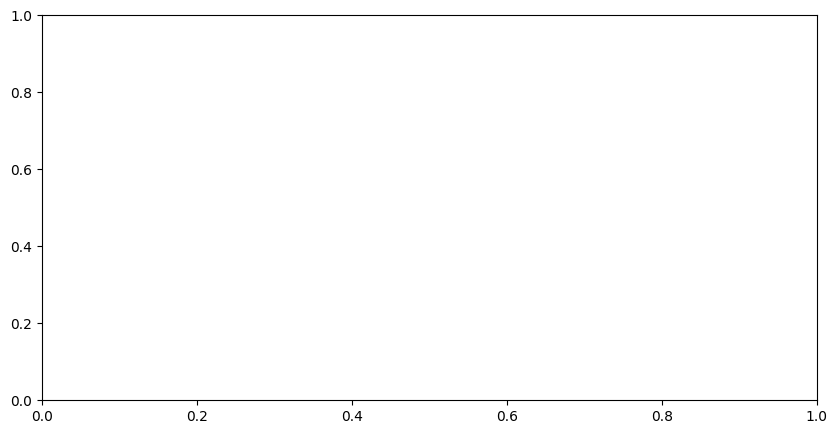

In [298]:
import matplotlib.pyplot as plt

def show_images(images):
    num_images = len(images)
    fig, axs = plt.subplots(1, num_images, figsize=(10, 5))  # Adjust figsize as needed

    for i in range(num_images):
        axs[i].imshow(images[i])
        axs[i].axis('off')

    plt.show()

show_images(images_uint8)

In [296]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_boxes_and_save(images, results, output_dir, dpi=100):
    order = 0
    for i, (image, result) in enumerate(zip(images, results)):
        # Create a new figure
        fig, ax = plt.subplots()

        # Plot the image
        ax.imshow(image)

        # Plot each bounding box
        for box, name in zip(result.boxes.xyxy, result.names):
            x1, y1, x2, y2 = box[:4]
            width = x2 - x1
            height = y2 - y1

            # Create a rectangle patch
            rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')

            # Add the rectangle patch to the Axes
            ax.add_patch(rect)

            # Add class label as text
            ax.text(x1, y1, name, color='r', verticalalignment='top')

        # Set axis off
        ax.axis('off')

        # Save the figure as PNG with specified DPI
        plt.savefig(f'{output_dir}/box_{i}.png', bbox_inches='tight', pad_inches=0, dpi=dpi)

        print(mapped_list[order])
        order += 1
        plt.show()
        
        # Close the figure to release memory
        plt.close()

# Example usage:
output_dir = r'C:\Users\Marios\Desktop\Μάριος\BotBattleOfSea\docs\src\ObjectDetectionsPlots'  # Directory to save the plots
plot_boxes_and_save(images_uint8, results, output_dir, dpi=100)


In [11]:
model = YOLO(absolute_path_object_model_2000px_windows)
names = model.model.names

text=''
confirm=False
enable_to_click_glitter=True
click_next_glitter=True
navigation=False
height, width = GetSystemMetrics(0), GetSystemMetrics(1)
# Set the center point for the visioneye annotation
center_point = (-10, pyautogui.size()[1])  # Use the screen height as the y-coordinate

run=True
i=1
while run:

    img = ImageGrab.grab(bbox=(0,0, width, height))
    img_np = np.array(img)
    screen_bgr = cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB)

    # Predict objects in the screenshot using the YOLO model
    results = model.predict(screen_bgr, conf=0.2)
    boxes = results[0].boxes.xyxy.cpu()
    clss = results[0].boxes.cls.cpu().tolist()
    Dictionary = results[0].names


    #prediction for Navigation
    resultsNavigation = model.predict(screen_bgr , imgsz=360, conf=0.2)
    boxesNavigation = results[0].boxes.xyxy.cpu()
    clssNavigation = results[0].boxes.cls.cpu().tolist()
    DictionaryNavigation = results[0].names



    #print(Dictionary.items())
    # Annotate the screenshot with bounding boxes and class labels
    annotator = Annotator(screen_bgr, line_width=2)
    for box, cls in zip(boxes, clss):
        #print(f"box={box}")
        #print(f"cls={cls}->{Dictionary[cls]}")
        print(f"**************detection********************box={box[0]}, cls={cls}->{Dictionary[cls]}")   
        time.sleep(time_of_pause) # for debugging only

        if(cls==12.0): #12: ocrText
            #print(f'box[0]={box[0]},box[1]={box[1]},box[2]={box[2]},box[3]={box[3]}')
            Numbers=screenshot_array(box[0],box[1],box[2],box[3],i)
            text=getText(Numbers)
            i=i+1
            print(f'text={text} and object={Dictionary[cls]}')
        ##################################################################        OCR CAPTURE CODE       ###########################################################################
        if(cls==5.0 and text!=''): #5.0: TextFieldToBotQuestion
            click(box[0],box[2],box[1],box[3])   
            time.sleep(1) 
            pyautogui.typewrite(text)
            time.sleep(1)
            text=''
            print(f'text={text}')
            confirm=True
            #run = False   
        if(cls==4.0 and confirm): #4.0: ConfirmToBotQuestion
            confirm=False
            click(box[0],box[2],box[1],box[3])
        #############################################################################################################################################################################
        if(cls==9.0): #9.0: glitterClicked
            centerCamera()
            time.sleep(2) 
            break
        elif(cls==8.0): #8.0: glitter
            stableCam()
            click(box[0],box[2],box[1],box[3])
            mouse_in_safe_zone()
            


        
                
            

        annotator.box_label(box, label=names[int(cls)], color=colors(int(cls)))
        annotator.visioneye(box, center_point)

    if keyboard.is_pressed('esc'):
            print("Stop Loop!")
            run = False

# Close all OpenCV windows
cv2.destroyAllWindows()


0: 1632x928 (no detections), 440.4ms
Speed: 18.0ms preprocess, 440.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1632, 928)

WARNING ⚠️ imgsz=[360] must be multiple of max stride 32, updating to [384]
0: 384x224 (no detections), 55.0ms
Speed: 1.0ms preprocess, 55.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 224)

0: 1632x928 (no detections), 403.6ms
Speed: 15.0ms preprocess, 403.6ms inference, 2.0ms postprocess per image at shape (1, 3, 1632, 928)

WARNING ⚠️ imgsz=[360] must be multiple of max stride 32, updating to [384]
0: 384x224 (no detections), 52.9ms
Speed: 2.5ms preprocess, 52.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 224)

0: 1632x928 (no detections), 403.6ms
Speed: 15.0ms preprocess, 403.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1632, 928)

WARNING ⚠️ imgsz=[360] must be multiple of max stride 32, updating to [384]
0: 384x224 (no detections), 53.0ms
Speed: 1.0ms preprocess, 53.0ms inference, 1.0ms postpro